In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3) uint8
x_test shape: (10000, 32, 32, 3) uint8
y_train shape: (50000, 10) float64
y_test shape: (10000, 10) float64
50000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [6]:
from pytorch import training

import pytorch_models

filters={"mnist":16,"mnist_rot":32,"cifar10":64,"fashion_mnist":32,"lsa16":16}

model = pytorch_models.AllConvolutional(input_shape,num_classes,
                                 filters=filters[dataset.name])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
parameters=training.add_weight_decay(model.named_parameters(),1e-13)
optimizer = optim.Adam(parameters, lr=0.0001)
print(model)

rotated_model=pytorch_models.AllConvolutional(input_shape,num_classes,
                                 filters=filters[dataset.name])

if use_cuda:
    rotated_model= rotated_model.cuda()
rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-13)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.0001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


AllConvolutional(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (class_conv): Conv2d(128, 10, kernel_size=(1, 1), stride=(1, 1))
)
AllConvolutional(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1,

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:  0.522, Time:  0:00:12


Test => Loss: 1.2850, Accuracy: 53.61% (5361/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.25, accuracy:  0.544, Time:  0:00:12


Test => Loss: 1.2664, Accuracy: 54.25% (5425/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.563, Time:  0:00:12


Test => Loss: 1.1891, Accuracy: 57.74% (5774/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.582, Time:  0:00:12


Test => Loss: 1.1349, Accuracy: 59.70% (5970/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:  0.593, Time:  0:00:12


Test => Loss: 1.1159, Accuracy: 60.38% (6038/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:   0.61, Time:  0:00:12


Test => Loss: 1.0893, Accuracy: 61.69% (6169/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.618, Time:  0:00:12


Test => Loss: 1.1326, Accuracy: 59.51% (5951/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:  0.629, Time:  0:00:12


Test => Loss: 1.0679, Accuracy: 62.36% (6236/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.638, Time:  0:00:12


Test => Loss: 1.0599, Accuracy: 62.55% (6255/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.989, accuracy:  0.648, Time:  0:00:12


Test => Loss: 0.9948, Accuracy: 64.47% (6447/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:  0.969, accuracy:  0.655, Time:  0:00:12


Test => Loss: 0.9803, Accuracy: 64.74% (6474/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.947, accuracy:  0.666, Time:  0:00:12


Test => Loss: 0.9756, Accuracy: 65.23% (6523/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.928, accuracy:  0.671, Time:  0:00:12


Test => Loss: 1.0011, Accuracy: 64.45% (6445/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.904, accuracy:  0.682, Time:  0:00:12


Test => Loss: 1.0116, Accuracy: 64.55% (6455/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.886, accuracy:  0.687, Time:  0:00:12


Test => Loss: 0.9088, Accuracy: 68.11% (6811/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.873, accuracy:  0.693, Time:  0:00:12


Test => Loss: 0.9044, Accuracy: 68.17% (6817/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.856, accuracy:  0.699, Time:  0:00:12


Test => Loss: 0.9121, Accuracy: 67.88% (6788/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:   0.84, accuracy:  0.705, Time:  0:00:12


Test => Loss: 0.8755, Accuracy: 69.39% (6939/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.819, accuracy:  0.713, Time:  0:00:12


Test => Loss: 0.8789, Accuracy: 68.99% (6899/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.808, accuracy:  0.717, Time:  0:00:12


Test => Loss: 0.8551, Accuracy: 69.82% (6982/10000)


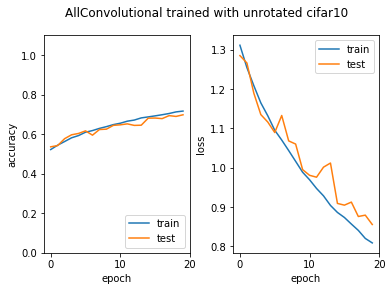

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   2.05, accuracy:  0.253, Time:  0:00:10


Test => Loss: 2.0040, Accuracy: 28.26% (2826/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.99, accuracy:   0.28, Time:  0:00:10


Test => Loss: 1.9128, Accuracy: 30.36% (3036/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:    1.9, accuracy:  0.308, Time:  0:00:10


Test => Loss: 1.8823, Accuracy: 32.47% (3247/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.86, accuracy:  0.334, Time:  0:00:10


Test => Loss: 1.8314, Accuracy: 34.91% (3491/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.82, accuracy:   0.35, Time:  0:00:10


Test => Loss: 1.8176, Accuracy: 36.02% (3602/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.79, accuracy:  0.368, Time:  0:00:10


Test => Loss: 1.7815, Accuracy: 37.22% (3722/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.76, accuracy:  0.379, Time:  0:00:10


Test => Loss: 1.7814, Accuracy: 38.45% (3845/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.74, accuracy:  0.392, Time:  0:00:10


Test => Loss: 1.7684, Accuracy: 38.30% (3830/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.72, accuracy:  0.401, Time:  0:00:09


Test => Loss: 1.7051, Accuracy: 40.62% (4062/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:    1.7, accuracy:  0.411, Time:  0:00:10


Test => Loss: 1.6871, Accuracy: 41.56% (4156/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.67, accuracy:   0.42, Time:  0:00:10


Test => Loss: 1.6733, Accuracy: 42.65% (4265/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.66, accuracy:  0.427, Time:  0:00:10


Test => Loss: 1.6632, Accuracy: 42.53% (4253/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.65, accuracy:  0.432, Time:  0:00:10


Test => Loss: 1.6519, Accuracy: 42.67% (4267/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.63, accuracy:  0.441, Time:  0:00:10


Test => Loss: 1.6220, Accuracy: 43.87% (4387/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:   1.61, accuracy:  0.444, Time:  0:00:10


Test => Loss: 1.6201, Accuracy: 45.22% (4522/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:    1.6, accuracy:  0.452, Time:  0:00:10


Test => Loss: 1.6276, Accuracy: 43.80% (4380/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:   1.58, accuracy:   0.46, Time:  0:00:10


Test => Loss: 1.5875, Accuracy: 46.01% (4601/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:   1.57, accuracy:  0.461, Time:  0:00:10


Test => Loss: 1.5633, Accuracy: 46.93% (4693/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:   1.56, accuracy:  0.466, Time:  0:00:10


Test => Loss: 1.5465, Accuracy: 46.84% (4684/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:   1.54, accuracy:  0.472, Time:  0:00:10


Test => Loss: 1.5621, Accuracy: 46.89% (4689/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:   1.53, accuracy:  0.476, Time:  0:00:10


Test => Loss: 1.5251, Accuracy: 48.05% (4805/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:   1.52, accuracy:   0.48, Time:  0:00:10


Test => Loss: 1.5474, Accuracy: 47.46% (4746/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:   1.51, accuracy:  0.486, Time:  0:00:10


Test => Loss: 1.5307, Accuracy: 47.08% (4708/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:    1.5, accuracy:  0.487, Time:  0:00:10


Test => Loss: 1.5051, Accuracy: 48.21% (4821/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:   1.49, accuracy:   0.49, Time:  0:00:10


Test => Loss: 1.5023, Accuracy: 49.18% (4918/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:   1.48, accuracy:  0.495, Time:  0:00:10


Test => Loss: 1.4856, Accuracy: 49.54% (4954/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:   1.47, accuracy:    0.5, Time:  0:00:10


Test => Loss: 1.4675, Accuracy: 50.59% (5059/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:   1.46, accuracy:  0.504, Time:  0:00:10


Test => Loss: 1.4801, Accuracy: 49.14% (4914/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:   1.45, accuracy:  0.507, Time:  0:00:10


Test => Loss: 1.4455, Accuracy: 50.71% (5071/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:   1.44, accuracy:   0.51, Time:  0:00:10


Test => Loss: 1.4704, Accuracy: 50.16% (5016/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:   1.43, accuracy:  0.515, Time:  0:00:10


Test => Loss: 1.4643, Accuracy: 50.54% (5054/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:   1.42, accuracy:  0.516, Time:  0:00:09


Test => Loss: 1.4241, Accuracy: 51.76% (5176/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:   1.41, accuracy:  0.522, Time:  0:00:10


Test => Loss: 1.4258, Accuracy: 51.15% (5115/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:    1.4, accuracy:  0.528, Time:  0:00:10


Test => Loss: 1.4284, Accuracy: 51.59% (5159/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:   1.39, accuracy:  0.529, Time:  0:00:10


Test => Loss: 1.4470, Accuracy: 50.66% (5066/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:   1.38, accuracy:  0.533, Time:  0:00:10


Test => Loss: 1.3932, Accuracy: 52.91% (5291/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:   1.38, accuracy:  0.536, Time:  0:00:10


Test => Loss: 1.4122, Accuracy: 52.37% (5237/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:   1.37, accuracy:  0.538, Time:  0:00:10


Test => Loss: 1.3802, Accuracy: 53.36% (5336/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:   1.36, accuracy:  0.542, Time:  0:00:10


Test => Loss: 1.3754, Accuracy: 53.16% (5316/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:   1.35, accuracy:  0.547, Time:  0:00:10


Test => Loss: 1.3973, Accuracy: 53.19% (5319/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:   1.34, accuracy:  0.547, Time:  0:00:10


Test => Loss: 1.4043, Accuracy: 52.10% (5210/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:   1.34, accuracy:  0.548, Time:  0:00:10


Test => Loss: 1.3519, Accuracy: 54.83% (5483/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:   1.33, accuracy:  0.553, Time:  0:00:10


Test => Loss: 1.3332, Accuracy: 55.63% (5563/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:   1.33, accuracy:  0.554, Time:  0:00:10


Test => Loss: 1.3605, Accuracy: 54.34% (5434/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:   1.32, accuracy:  0.556, Time:  0:00:10


Test => Loss: 1.3345, Accuracy: 55.39% (5539/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:   0.56, Time:  0:00:10


Test => Loss: 1.3322, Accuracy: 55.20% (5520/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:  0.562, Time:  0:00:10


Test => Loss: 1.3750, Accuracy: 53.47% (5347/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:   1.29, accuracy:  0.568, Time:  0:00:10


Test => Loss: 1.3173, Accuracy: 55.71% (5571/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:   1.29, accuracy:  0.567, Time:  0:00:10


Test => Loss: 1.3055, Accuracy: 56.33% (5633/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:   1.28, accuracy:  0.571, Time:  0:00:10


Test => Loss: 1.2986, Accuracy: 56.62% (5662/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:   1.28, accuracy:  0.572, Time:  0:00:10


Test => Loss: 1.3024, Accuracy: 56.60% (5660/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:   1.27, accuracy:  0.576, Time:  0:00:10


Test => Loss: 1.3563, Accuracy: 55.13% (5513/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:   1.27, accuracy:  0.576, Time:  0:00:10


Test => Loss: 1.3332, Accuracy: 55.94% (5594/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:   1.26, accuracy:   0.58, Time:  0:00:10


Test => Loss: 1.3078, Accuracy: 56.80% (5680/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:   1.26, accuracy:  0.581, Time:  0:00:10


Test => Loss: 1.2870, Accuracy: 57.01% (5701/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:   1.25, accuracy:  0.583, Time:  0:00:10


Test => Loss: 1.2783, Accuracy: 57.36% (5736/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:   1.24, accuracy:  0.586, Time:  0:00:09


Test => Loss: 1.2569, Accuracy: 58.30% (5830/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:   1.24, accuracy:  0.588, Time:  0:00:10


Test => Loss: 1.2709, Accuracy: 57.47% (5747/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:   1.23, accuracy:  0.589, Time:  0:00:10


Test => Loss: 1.2982, Accuracy: 56.89% (5689/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:   1.23, accuracy:  0.588, Time:  0:00:10


Test => Loss: 1.2645, Accuracy: 58.42% (5842/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.596, Time:  0:00:10


Test => Loss: 1.2513, Accuracy: 58.49% (5849/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.596, Time:  0:00:10


Test => Loss: 1.2348, Accuracy: 59.19% (5919/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.598, Time:  0:00:10


Test => Loss: 1.2480, Accuracy: 59.03% (5903/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.599, Time:  0:00:10


Test => Loss: 1.2437, Accuracy: 58.52% (5852/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:    1.2, accuracy:  0.602, Time:  0:00:10


Test => Loss: 1.2349, Accuracy: 59.31% (5931/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:    1.2, accuracy:  0.602, Time:  0:00:10


Test => Loss: 1.2413, Accuracy: 59.07% (5907/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:   1.19, accuracy:  0.607, Time:  0:00:10


Test => Loss: 1.2384, Accuracy: 58.69% (5869/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:   1.19, accuracy:  0.607, Time:  0:00:10


Test => Loss: 1.2288, Accuracy: 59.35% (5935/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:   1.18, accuracy:  0.609, Time:  0:00:10


Test => Loss: 1.2202, Accuracy: 59.76% (5976/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:   1.18, accuracy:  0.611, Time:  0:00:10


Test => Loss: 1.2237, Accuracy: 59.40% (5940/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.612, Time:  0:00:10


Test => Loss: 1.2580, Accuracy: 58.53% (5853/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:   1.17, accuracy:  0.614, Time:  0:00:10


Test => Loss: 1.2459, Accuracy: 58.39% (5839/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:   1.16, accuracy:  0.615, Time:  0:00:10


Test => Loss: 1.2167, Accuracy: 59.46% (5946/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:   1.16, accuracy:  0.616, Time:  0:00:10


Test => Loss: 1.2044, Accuracy: 60.34% (6034/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:   1.16, accuracy:  0.617, Time:  0:00:10


Test => Loss: 1.2053, Accuracy: 60.48% (6048/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:  0.617, Time:  0:00:10


Test => Loss: 1.1683, Accuracy: 61.24% (6124/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:  0.621, Time:  0:00:10


Test => Loss: 1.2088, Accuracy: 59.90% (5990/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.621, Time:  0:00:10


Test => Loss: 1.1793, Accuracy: 61.03% (6103/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.622, Time:  0:00:10


Test => Loss: 1.1782, Accuracy: 61.14% (6114/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:  0.626, Time:  0:00:10


Test => Loss: 1.1795, Accuracy: 61.16% (6116/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:  0.627, Time:  0:00:10


Test => Loss: 1.1664, Accuracy: 61.32% (6132/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:   1.13, accuracy:  0.626, Time:  0:00:10


Test => Loss: 1.1820, Accuracy: 61.50% (6150/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:   1.12, accuracy:   0.63, Time:  0:00:10


Test => Loss: 1.1668, Accuracy: 61.50% (6150/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:   1.12, accuracy:  0.631, Time:  0:00:10


Test => Loss: 1.1671, Accuracy: 61.31% (6131/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:   1.12, accuracy:   0.63, Time:  0:00:10


Test => Loss: 1.1599, Accuracy: 62.06% (6206/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.633, Time:  0:00:10


Test => Loss: 1.1689, Accuracy: 61.79% (6179/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.634, Time:  0:00:10


Test => Loss: 1.1446, Accuracy: 62.34% (6234/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:   1.11, accuracy:  0.635, Time:  0:00:10


Test => Loss: 1.1508, Accuracy: 62.29% (6229/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.637, Time:  0:00:09


Test => Loss: 1.1543, Accuracy: 62.04% (6204/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.639, Time:  0:00:10


Test => Loss: 1.1622, Accuracy: 61.86% (6186/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.639, Time:  0:00:10


Test => Loss: 1.1387, Accuracy: 62.72% (6272/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:   1.09, accuracy:  0.639, Time:  0:00:10


Test => Loss: 1.1485, Accuracy: 61.83% (6183/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:   1.09, accuracy:  0.643, Time:  0:00:10


Test => Loss: 1.1740, Accuracy: 61.63% (6163/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.643, Time:  0:00:10


Test => Loss: 1.1432, Accuracy: 62.50% (6250/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.645, Time:  0:00:10


Test => Loss: 1.1345, Accuracy: 63.09% (6309/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.643, Time:  0:00:10


Test => Loss: 1.1301, Accuracy: 62.83% (6283/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.645, Time:  0:00:10


Test => Loss: 1.1447, Accuracy: 62.68% (6268/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.648, Time:  0:00:10


Test => Loss: 1.1356, Accuracy: 62.82% (6282/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.649, Time:  0:00:10


Test => Loss: 1.1446, Accuracy: 61.95% (6195/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:   0.65, Time:  0:00:10


Test => Loss: 1.1262, Accuracy: 63.22% (6322/10000)


Epoch 101: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:   0.65, Time:  0:00:10


Test => Loss: 1.1157, Accuracy: 63.84% (6384/10000)


Epoch 102: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:   0.65, Time:  0:00:10


Test => Loss: 1.1128, Accuracy: 63.69% (6369/10000)


Epoch 103: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.652, Time:  0:00:10


Test => Loss: 1.1147, Accuracy: 63.24% (6324/10000)


Epoch 104: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.654, Time:  0:00:10


Test => Loss: 1.1193, Accuracy: 63.40% (6340/10000)


Epoch 105: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.656, Time:  0:00:10


Test => Loss: 1.1003, Accuracy: 64.15% (6415/10000)


Epoch 106: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.656, Time:  0:00:10


Test => Loss: 1.1172, Accuracy: 63.52% (6352/10000)


Epoch 107: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.654, Time:  0:00:10


Test => Loss: 1.1180, Accuracy: 62.83% (6283/10000)


Epoch 108: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:  0.657, Time:  0:00:10


Test => Loss: 1.1555, Accuracy: 62.31% (6231/10000)


Epoch 109: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:  0.658, Time:  0:00:10


Test => Loss: 1.0992, Accuracy: 63.84% (6384/10000)


Epoch 110: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:  0.659, Time:  0:00:10


Test => Loss: 1.1013, Accuracy: 63.88% (6388/10000)


Epoch 111: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.658, Time:  0:00:10


Test => Loss: 1.0974, Accuracy: 64.24% (6424/10000)


Epoch 112: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.661, Time:  0:00:10


Test => Loss: 1.0832, Accuracy: 64.40% (6440/10000)


Epoch 113: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.662, Time:  0:00:10


Test => Loss: 1.0962, Accuracy: 63.97% (6397/10000)


Epoch 114: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.664, Time:  0:00:10


Test => Loss: 1.1111, Accuracy: 64.05% (6405/10000)


Epoch 115: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.664, Time:  0:00:10


Test => Loss: 1.0796, Accuracy: 64.59% (6459/10000)


Epoch 116: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.665, Time:  0:00:10


Test => Loss: 1.0826, Accuracy: 64.98% (6498/10000)


Epoch 117: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.667, Time:  0:00:10


Test => Loss: 1.1061, Accuracy: 63.84% (6384/10000)


Epoch 118: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.666, Time:  0:00:10


Test => Loss: 1.0757, Accuracy: 64.47% (6447/10000)


Epoch 119: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.668, Time:  0:00:10


Test => Loss: 1.1163, Accuracy: 63.24% (6324/10000)


Epoch 120: 100% (batch 782/782)  ==stats==> loss:   1.01, accuracy:  0.669, Time:  0:00:10


Test => Loss: 1.0875, Accuracy: 64.25% (6425/10000)


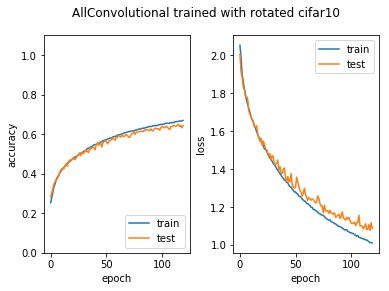

Testing both models on both datasets...


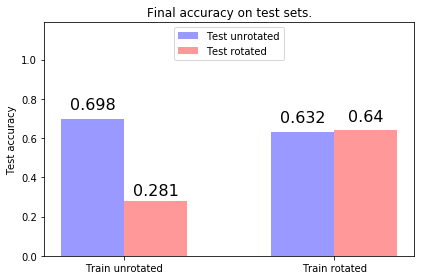

model_rotated_test_dataset score: loss=2.829861, accuracy=0.281000
model_rotated_train_dataset score: loss=2.815127, accuracy=0.283340
model_test_dataset score: loss=0.855132, accuracy=0.698200
model_train_dataset score: loss=0.772710, accuracy=0.729800
rotated_model_rotated_test_dataset score: loss=1.090414, accuracy=0.640200
rotated_model_rotated_train_dataset score: loss=1.004364, accuracy=0.673080
rotated_model_test_dataset score: loss=1.133226, accuracy=0.632500
rotated_model_train_dataset score: loss=1.063022, accuracy=0.654000


In [8]:
batch_size = 64

epochs={'cifar10':70,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':120,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [ ]:
from pytorch.experiment import invariance
n_rotations=16
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

rotated_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)



In [ ]:
invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True)



In [ ]:
invariance_measure,classes=invariance.run(model,dataset,config,rotations)
invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True)


In [ ]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,rotated_model,dataset.name,classes,savefig=True)


In [ ]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,savefig=True)